# Exercise 2-2: Write your own code for the Mortality Notebook

In [106]:
import pandas as pd

## Get the long and wide DataFrames

In [107]:
# get data
mortality_data = pd.read_pickle('mortality_data.pkl')
# remove spaces to calculate columns
mortality_data.columns = mortality_data.columns.str.replace(" ", "")
# create mean centered
mortality_data["MeanCentered"] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()
# make all numbers 2-digits long
mortality_data.AgeGroup.replace(
    to_replace = ['1-4 Years','5-9 Years'],
    value = ['01-04 Years','05-09 Years'],
    inplace = True)
# display head
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [108]:
# get data
mortality_wide = pd.read_pickle('mortality_wide.pkl')
# display head
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


## Work With the long DataFrame

In [109]:
# Display the first five rows of the dataframe.
mortality_data.head(5)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [110]:
# Change the name of the "DeathRate' column to "DeathRate/100K", since that is a more descriptive name for the data in the column.
mortality_data.columns = mortality_data.columns.str.replace("DeathRate", "Deaths/100K")
mortality_data

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584
...,...,...,...,...
471,2014,15-19 Years,45.5,-147.42416
472,2015,15-19 Years,48.3,-144.62416
473,2016,15-19 Years,51.2,-141.72416
474,2017,15-19 Years,51.5,-141.42416


In [111]:
# Access and display the first five rows of the year and MeanCentered columns.
mortality_data.loc[:, ["Year", "MeanCentered"]].head(5)

,Year,MeanCentered
0,1900,1790.87584
1,1901,1502.07584
2,1902,1462.77584
3,1903,1349.17584
4,1904,1398.57584


In [112]:
# Access and display the last six rows of data from 1915 through 1920.
mortality_data.query("Year >= 1915 and Year <= 1920").tail(6)

,Year,AgeGroup,Deaths/100K,MeanCentered
372,1915,15-19 Years,330.9,137.97584
373,1916,15-19 Years,355.8,162.87584
374,1917,15-19 Years,380.3,187.37584
375,1918,15-19 Years,777.4,584.47584
376,1919,15-19 Years,438.5,245.57584
377,1920,15-19 Years,402.9,209.97584


In [113]:
# Access and display the Year and Deaths/100K columns for the age group of 01-04 Years.
mortality_data.query("AgeGroup == '01-04 Years'").loc[:, ["Year", "Deaths/100K"]]

,Year,Deaths/100K
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
114,2014,24.0
115,2015,24.9
116,2016,25.3
117,2017,24.3


In [114]:
# Sort the DataFrame by the Deaths/100K column in descending sequence and display the results. Then modify the cell so it displays the first and last three rows of results.
with pd.option_context('display.max_rows', 6):
    display(mortality_data.sort_values("Deaths/100K", ascending=False))

,Year,AgeGroup,Deaths/100K,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
...,...,...,...,...
233,2014,05-09 Years,11.5,-181.42416
229,2010,05-09 Years,11.5,-181.42416
231,2012,05-09 Years,11.4,-181.52416


In [115]:
# Calculate the median of all of the values in the Deaths/100K column.
print("Median Deaths/100K: " + str(mortality_data["Deaths/100K"].median()))

Median Deaths/100K: 89.5


In [116]:
# Group the data by year, and calculate the sum of the Deaths/100K column.
mortality_data.groupby("Year").sum("Deaths/100K")

,Deaths/100K,MeanCentered
Year,,
1900,3233.0,2461.303361
1901,2850.6,2078.903361
1902,2733.0,1961.303361
1903,2659.1,1887.403361
1904,2793.1,2021.403361
...,...,...
2014,95.0,-676.696639
2015,99.5,-672.196639
2016,103.3,-668.396639


## Work with the wide DataFrame

In [117]:
# Display the first five rows of the dataframe.
mortality_wide.head(5)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


In [118]:
# Display the index information for the dataframe.
# mortality_wide.columns
# mortality_wide.info()
mortality_wide.index

RangeIndex(start=0, stop=119, step=1)

In [119]:
# Use the describe() method to display statistical information for the numeric columns in the dataframe. Start by coding this statement without the T property, and then add the T property to see how the display changes.
mortality_wide.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.000000,34.496377,1900.000000,1929.500000,1959.000000,1988.500000,2018.000000
01-04 Years,119.0,0.003832,0.005005,0.000240,0.000507,0.001091,0.005773,0.019838
05-09 Years,119.0,0.001173,0.001275,0.000114,0.000240,0.000484,0.001989,0.004661
10-14 Years,119.0,0.000938,0.000884,0.000139,0.000272,0.000446,0.001589,0.003751
15-19 Years,119.0,0.001774,0.001384,0.000448,0.000855,0.001069,0.002837,0.007774


In [120]:
# Access and display just the Year and 01-04 Years columns.
mortality_wide.loc[:, ["Year", "01-04 Years"]]

,Year,01-04 Years
0,1900,0.019838
1,1901,0.016950
2,1902,0.016557
3,1903,0.015421
4,1904,0.015915
...,...,...
114,2014,0.000240
115,2015,0.000249
116,2016,0.000253
117,2017,0.000243


In [121]:
# Access and display just the rows for the years from 1915 through 1920.
mortality_wide.query("Year >= 1915 and Year <= 1920")

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
15,1915,0.009242,0.002606,0.001967,0.003309
16,1916,0.011115,0.002824,0.002051,0.003558
17,1917,0.010660,0.002907,0.002189,0.003803
18,1918,0.015735,0.004479,0.003751,0.007774
19,1919,0.009280,0.003000,0.002364,0.004385
20,1920,0.009872,0.002952,0.002299,0.004029


In [122]:
# Combine steps 4 and 5 into a single cell that accesses and displays the Year and 01-04 Years columns for the years 1915 through 1920.
mortality_wide.query("Year >= 1915 and Year <= 1920").loc[:, ["Year", "01-04 Years"]]

,Year,01-04 Years
15,1915,0.009242
16,1916,0.011115
17,1917,0.010660
18,1918,0.015735
19,1919,0.009280
20,1920,0.009872


In [123]:
# Aggregate the data for all numeric columns in each year, and display the mean, median, and sum for those columns.
mortality_wide.agg(['sum', 'mean', 'median'])

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
sum,233121.0,0.456039,0.139618,0.111586,0.211076
mean,1959.0,0.003832,0.001173,0.000938,0.001774
median,1959.0,0.001091,0.000484,0.000446,0.001069


In [124]:
# Add a new column to the dataframe named TotalDeaths. The value of the column should be the sum of the values in each of the year range columns. Display the dataframe with the new column.
mortality_wide["TotalDeaths"] = \
    mortality_wide["01-04 Years"] + mortality_wide["05-09 Years"] + mortality_wide["10-14 Years"] + mortality_wide["15-19 Years"]

# set index to year to allow for display in plot
mortality_wide.set_index('Year', inplace=True)

<AxesSubplot:xlabel='Year'>

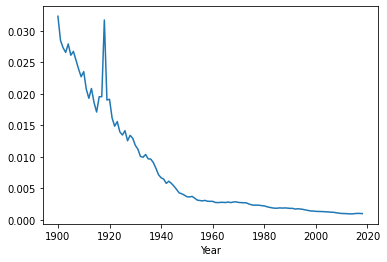

In [127]:
# Create a line plot that shows the total death rate by year.
mortality_wide["TotalDeaths"].plot(x='Year', xlabel='Year')